# Supervised By: Dr. Abeer Amer
#### Mostafa Gouda 20201447827
#### Hisham Medhat 20201498820
#### Omar Beshr 20201445800
#### Mohab Yousry 20201374343
#### Ahmed Said Hammad 20201010800 
#### Fares Galal 20201447840
#### Ahmed Alaa Eldin 20201010784

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing

Import the players dataset with heights

In [2]:
players_data = pd.read_excel("players_data_with_heights.xlsx")
players_data

,Name,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,REB,AST,STL,BLK,TO,DD2,TD3,PER,height
0,Joel Embiid,C,68,33.8,30.6,9.8,19.6,49.9,1.4,3.7,...,81.4,11.7,4.2,1.1,1.5,3.1,46,2,31.24,213.36
1,LeBron James,SF,56,37.2,30.3,11.4,21.8,52.4,2.9,8.0,...,75.6,8.2,6.2,1.3,1.1,3.5,21,6,26.25,205.74
2,Giannis Antetokounmpo,PF,67,32.9,29.9,10.3,18.6,55.3,1.1,3.6,...,72.2,11.6,5.8,1.1,1.4,3.3,46,4,32.12,210.82
3,Kevin Durant,PF,55,37.2,29.9,10.5,20.3,51.8,2.1,5.5,...,91.0,7.4,6.4,0.9,0.9,3.5,18,4,25.69,208.28
4,Luka Doncic,PG,65,35.4,28.4,9.9,21.6,45.7,3.1,8.8,...,74.4,9.1,8.7,1.2,0.6,4.5,44,10,25.13,200.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,Scottie Lewis,SG,2,3.5,0.5,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,0.5,0.5,0.0,0.0,0,0,14.61,195.58
586,Aaron Henry,SF,6,2.8,0.3,0.2,0.8,20.0,0.0,0.2,...,0.0,0.2,0.0,0.0,0.3,0.3,0,0,-7.34,NaN
587,Miye Oni,SG,16,2.8,0.3,0.1,0.6,22.2,0.1,0.5,...,0.0,0.4,0.3,0.0,0.0,0.1,0,0,0.40,NaN
588,Joel Ayayi,G,7,2.9,0.3,0.1,0.9,16.7,0.0,0.1,...,0.0,0.4,0.6,0.0,0.0,0.0,0,0,3.43,NaN


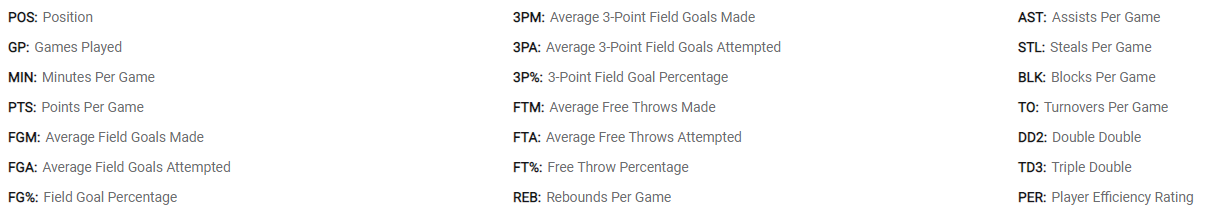

Clean the name column because it has trailing spaces in the title and values

In [3]:
print(players_data.columns)
players_data.rename(columns={players_data.columns[0]: "Name"}, inplace=True)
print(players_data.columns)
players_data["Name"] = players_data["Name"].map(lambda name: name.strip())

Index(['          Name        ', 'POS', 'GP', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'STL',
       'BLK', 'TO', 'DD2', 'TD3', 'PER', 'height'],
      dtype='object')
Index(['Name', 'POS', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TO', 'DD2',
       'TD3', 'PER', 'height'],
      dtype='object')


Remove rows containing null values

In [4]:
players_data.dropna(inplace=True)

Count the number of duplicates

In [5]:
players_data.duplicated().sum()

9

Remove duplicate rows

In [6]:
players_data.drop_duplicates(inplace=True)

Get players that have average game time greater than 10 minutes and have played more than 15 games 

In [7]:
players_data = players_data.query("MIN > 10 & GP > 15")
players_data

,Name,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,REB,AST,STL,BLK,TO,DD2,TD3,PER,height
0,Joel Embiid,C,68,33.8,30.6,9.8,19.6,49.9,1.4,3.7,...,81.4,11.7,4.2,1.1,1.5,3.1,46,2,31.24,213.36
1,LeBron James,SF,56,37.2,30.3,11.4,21.8,52.4,2.9,8.0,...,75.6,8.2,6.2,1.3,1.1,3.5,21,6,26.25,205.74
2,Giannis Antetokounmpo,PF,67,32.9,29.9,10.3,18.6,55.3,1.1,3.6,...,72.2,11.6,5.8,1.1,1.4,3.3,46,4,32.12,210.82
3,Kevin Durant,PF,55,37.2,29.9,10.5,20.3,51.8,2.1,5.5,...,91.0,7.4,6.4,0.9,0.9,3.5,18,4,25.69,208.28
4,Luka Doncic,PG,65,35.4,28.4,9.9,21.6,45.7,3.1,8.8,...,74.4,9.1,8.7,1.2,0.6,4.5,44,10,25.13,200.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Elfrid Payton,PG,50,11.0,3.0,1.3,3.5,38.3,0.1,0.4,...,37.5,1.8,2.0,0.5,0.1,0.9,0,0,7.89,190.50
492,Javonte Smart,G,17,11.8,3.0,1.1,3.5,31.7,0.5,1.6,...,83.3,1.4,0.9,0.4,0.2,0.6,0,0,5.12,193.04
507,Josh Okogie,SF,49,10.5,2.7,0.9,2.1,40.4,0.3,1.0,...,68.6,1.4,0.5,0.5,0.2,0.5,0,0,9.04,193.04
527,Jericho Sims,PF,41,13.5,2.2,1.0,1.3,72.2,0.0,0.0,...,41.4,4.1,0.5,0.3,0.5,0.5,1,0,11.65,205.74


Get a statistical summary of the data

In [8]:
players_data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,FT%,REB,AST,STL,BLK,TO,DD2,TD3,PER,height
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,...,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,57.868812,23.379950,10.759406,3.950990,8.580446,46.235644,1.203465,3.417327,32.296040,1.657426,...,76.667079,4.284158,2.411634,0.742079,0.459406,1.279208,5.274752,0.321782,14.407995,198.572673
std,15.785162,7.466053,6.063746,2.171133,4.600441,7.533295,0.874104,2.290394,10.055142,1.391866,...,10.105244,2.336345,1.902470,0.362116,0.392657,0.822128,10.074967,1.583231,4.400319,8.157930
min,16.000000,10.200000,2.000000,0.700000,1.300000,29.600000,0.000000,0.000000,0.000000,0.100000,...,37.500000,0.800000,0.000000,0.100000,0.000000,0.200000,0.000000,0.000000,3.720000,175.260000
25%,48.000000,17.000000,6.200000,2.400000,5.100000,41.000000,0.500000,1.775000,30.550000,0.700000,...,70.875000,2.600000,1.000000,0.500000,0.200000,0.700000,0.000000,0.000000,11.302500,193.040000
50%,61.000000,23.000000,9.000000,3.400000,7.100000,44.950000,1.000000,3.000000,34.000000,1.200000,...,78.250000,3.800000,1.800000,0.700000,0.400000,1.000000,1.000000,0.000000,13.720000,198.120000
75%,70.000000,29.600000,13.875000,5.100000,11.025000,49.425000,1.800000,5.000000,37.525000,2.025000,...,84.125000,5.300000,3.125000,0.900000,0.600000,1.600000,5.000000,0.000000,16.970000,205.740000
max,82.000000,37.900000,30.600000,11.400000,21.800000,76.100000,4.500000,11.700000,100.000000,9.600000,...,100.000000,14.700000,10.800000,2.200000,2.800000,4.500000,66.000000,19.000000,32.940000,220.980000


In [9]:
km = players_data.copy(deep=True)

Remove irrelevant attributes

In [10]:
players_data.drop(["Name","DD2", "TD3", "PER", "GP"], axis=1, inplace=True)

Generate a correlation matrix that show the correlation between each attribute

<AxesSubplot:>

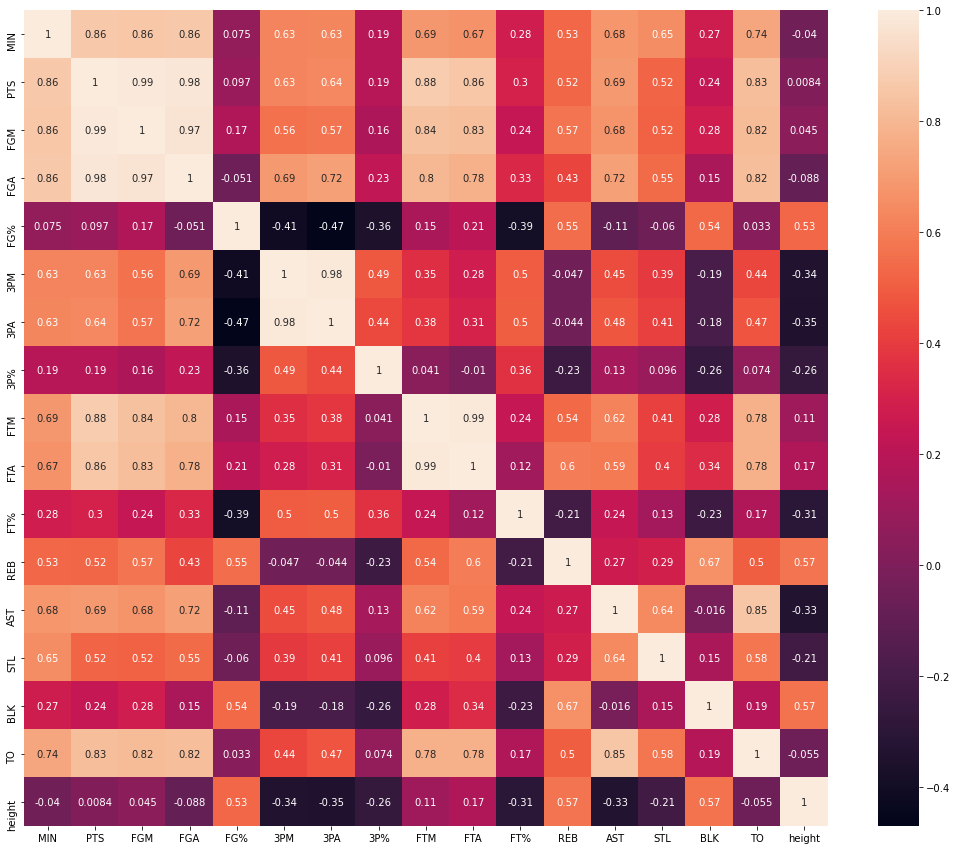

In [11]:
plt.figure(figsize=(18,15))
sns.heatmap(players_data.corr(), annot=True)

Remove correlated attributes

In [12]:
players_data.drop(["FGM", "FTM", "MIN", "3PM", "PTS", "TO"], axis=1, inplace=True)
players_data.head()

,POS,FGA,FG%,3PA,3P%,FTA,FT%,REB,AST,STL,BLK,height
0,C,19.6,49.9,3.7,37.1,11.8,81.4,11.7,4.2,1.1,1.5,213.36
1,SF,21.8,52.4,8.0,35.9,6.0,75.6,8.2,6.2,1.3,1.1,205.74
2,PF,18.6,55.3,3.6,29.3,11.4,72.2,11.6,5.8,1.1,1.4,210.82
3,PF,20.3,51.8,5.5,38.3,7.4,91.0,7.4,6.4,0.9,0.9,208.28
4,PG,21.6,45.7,8.8,35.3,7.5,74.4,9.1,8.7,1.2,0.6,200.66


Generate correlation matrix again to test our decisions

<AxesSubplot:>

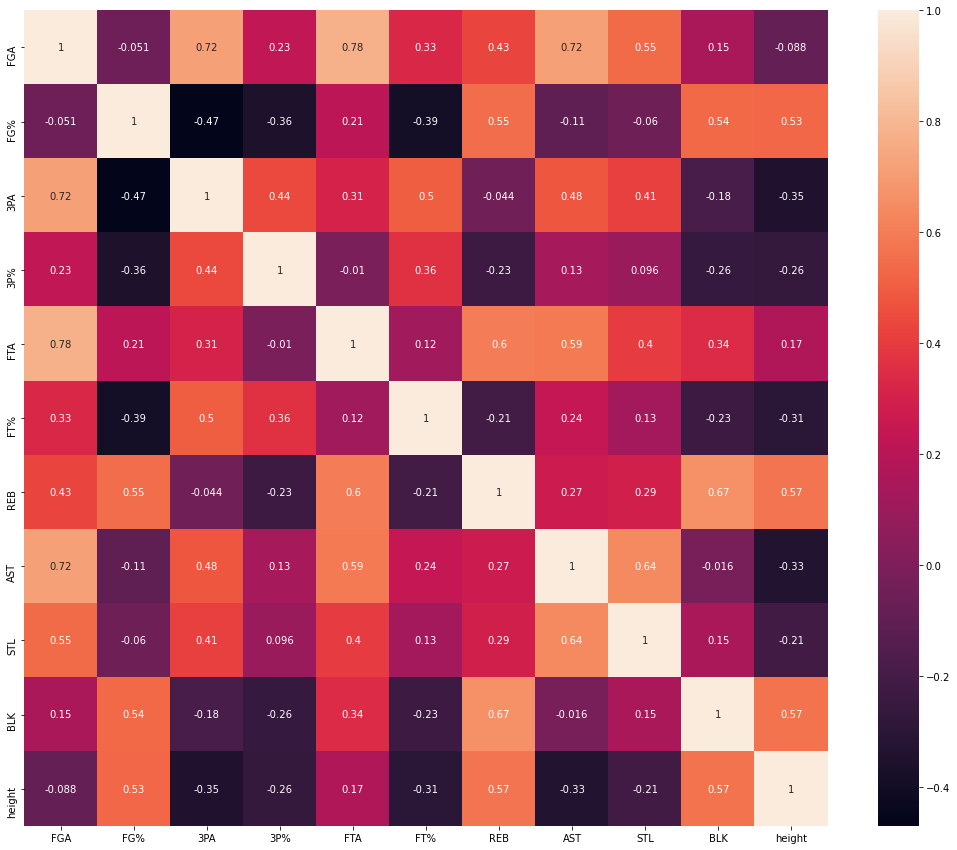

In [13]:
plt.figure(figsize=(18,15))
sns.heatmap(players_data.corr(), annot=True)

In [14]:
players_data

,POS,FGA,FG%,3PA,3P%,FTA,FT%,REB,AST,STL,BLK,height
0,C,19.6,49.9,3.7,37.1,11.8,81.4,11.7,4.2,1.1,1.5,213.36
1,SF,21.8,52.4,8.0,35.9,6.0,75.6,8.2,6.2,1.3,1.1,205.74
2,PF,18.6,55.3,3.6,29.3,11.4,72.2,11.6,5.8,1.1,1.4,210.82
3,PF,20.3,51.8,5.5,38.3,7.4,91.0,7.4,6.4,0.9,0.9,208.28
4,PG,21.6,45.7,8.8,35.3,7.5,74.4,9.1,8.7,1.2,0.6,200.66
...,...,...,...,...,...,...,...,...,...,...,...,...
488,PG,3.5,38.3,0.4,22.2,0.6,37.5,1.8,2.0,0.5,0.1,190.50
492,G,3.5,31.7,1.6,29.6,0.4,83.3,1.4,0.9,0.4,0.2,193.04
507,SF,2.1,40.4,1.0,29.8,1.0,68.6,1.4,0.5,0.5,0.2,193.04
527,PF,1.3,72.2,0.0,0.0,0.7,41.4,4.1,0.5,0.3,0.5,205.74


Converting the "Field Goals Attempted" column from numeric to categorical using cut method in pandas

In [15]:
pd.cut(players_data["FGA"], bins=3).value_counts()

(1.28, 8.133]      232
(8.133, 14.967]    124
(14.967, 21.8]      48
Name: FGA, dtype: int64

In [16]:
FGA_labels = ["Passive Shooter", "Average Shooter", "Active Shooter"]

In [17]:
players_data.insert(1, "FGA_bins", pd.cut(players_data["FGA"], bins=3, labels=FGA_labels))
players_data.head()

,POS,FGA_bins,FGA,FG%,3PA,3P%,FTA,FT%,REB,AST,STL,BLK,height
0,C,Active Shooter,19.6,49.9,3.7,37.1,11.8,81.4,11.7,4.2,1.1,1.5,213.36
1,SF,Active Shooter,21.8,52.4,8.0,35.9,6.0,75.6,8.2,6.2,1.3,1.1,205.74
2,PF,Active Shooter,18.6,55.3,3.6,29.3,11.4,72.2,11.6,5.8,1.1,1.4,210.82
3,PF,Active Shooter,20.3,51.8,5.5,38.3,7.4,91.0,7.4,6.4,0.9,0.9,208.28
4,PG,Active Shooter,21.6,45.7,8.8,35.3,7.5,74.4,9.1,8.7,1.2,0.6,200.66


# Part 2

In [18]:
players_data['POS'].replace({'PG':'G','SG':'G','SF':'F','PF':'F'},inplace=True)

Summary stats by position

In [19]:
players_data.groupby('POS').mean()

,FGA,FG%,3PA,3P%,FTA,FT%,REB,AST,STL,BLK,height
POS,,,,,,,,,,,
C,7.292537,56.019403,1.317910,24.508955,2.537313,69.723881,6.922388,1.597015,0.585075,0.902985,209.568955
F,8.090132,46.243421,3.234211,33.145395,2.103947,75.677632,4.431579,1.817763,0.714474,0.496711,201.445395
G,9.449730,42.685946,4.328108,34.418378,2.011892,79.994595,3.207568,3.194595,0.821622,0.268108,192.229946


To visualize number of players in every position

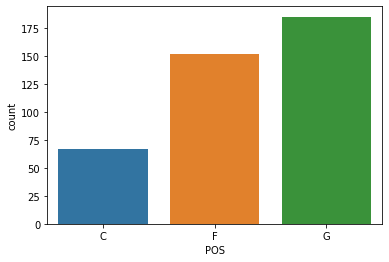

In [20]:
sns.countplot(players_data['POS']);

C is a Center

F is a Forward

G is a Guard

Normalizing all the numeric values because all columns are not on the same scale

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
players_data_normal = players_data[['FGA','FG%','3PA','3P%','FTA','FT%','REB','AST','STL','BLK','height']]

In [24]:
scaler.fit(players_data_normal)

StandardScaler()

In [25]:
scaled = scaler.transform(players_data_normal)

In [26]:
norm = pd.DataFrame(scaled,columns=['FGA','FG%','3PA','3P%','FTA','FT%','REB','AST','STL','BLK','height'])

Normalized Data

In [27]:
norm.head()

,FGA,FG%,3PA,3P%,FTA,FT%,REB,AST,STL,BLK,height
0,2.398296,0.487025,0.123570,0.478354,5.695204,0.468944,3.178057,0.941189,0.989640,2.653423,1.814880
1,2.877104,0.819296,2.003304,0.358864,2.277965,-0.105728,1.678133,1.993757,1.542633,1.633458,0.879661
2,2.180656,1.204731,0.079855,-0.298330,5.459532,-0.442604,3.135202,1.783244,0.989640,2.398432,1.503140
3,2.550644,0.739551,0.910436,0.597844,3.102816,1.420123,1.335293,2.099014,0.436646,1.123476,1.191401
4,2.833576,-0.071192,2.353022,0.299119,3.161734,-0.224625,2.063827,3.309468,1.266136,0.358502,0.256182


Splitting data into X containing the features and y containing the target column

In [28]:
X = norm
y = players_data['POS']

Splitting X and y into X_train, X_test, y_train, y_test and checking the shape of each

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=73)

In [31]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)

X_train: (323, 11)
X_test: (81, 11)


In [32]:
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

y_train: (323,)
y_test: (81,)


# KNN

Importing KNN libraries

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

Creating a for loop to get the best value for the K

In [34]:
errors = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    errors.append(np.mean(pred!=y_test))
    

Visualizing it

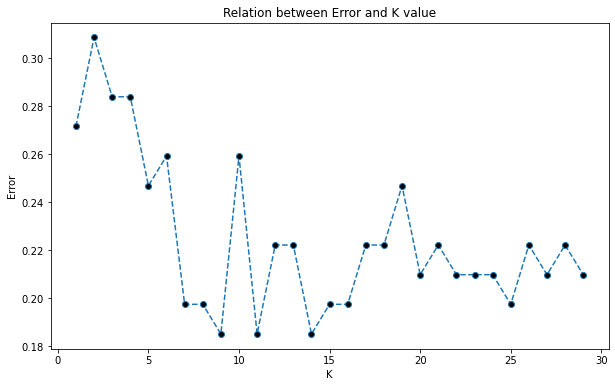

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),errors,marker='o',markerfacecolor='black',linestyle='dashed')
plt.title('Relation between Error and K value')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

15 has the least error for the K

In [36]:
knn = KNeighborsClassifier(n_neighbors = 15)

Creating the model by fitting the data

In [37]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [38]:
pred = knn.predict(X_test)

In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           C       0.83      0.91      0.87        11
           F       0.81      0.71      0.76        35
           G       0.79      0.86      0.82        35

    accuracy                           0.80        81
   macro avg       0.81      0.83      0.82        81
weighted avg       0.80      0.80      0.80        81



We got 88% accuracy

Precison: Accuracy of positive predicitons 86%

Recall: Fraction of positives that were correctly identified 87%

F1 Score: The percentage of positive predictions correctly predicted 86%

In [40]:
print(confusion_matrix(y_test,pred))

[[10  1  0]
 [ 2 25  8]
 [ 0  5 30]]


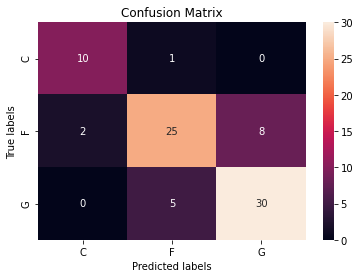

In [41]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['C', 'F','G']);
ax.yaxis.set_ticklabels(['C', 'F','G']);

# Decision Tree

Importing Decision Tree library

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtree = DecisionTreeClassifier(random_state=47)

Creating the model by fitting the data

In [44]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=47)

In [45]:
pred = dtree.predict(X_test)

In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           C       0.60      0.55      0.57        11
           F       0.62      0.69      0.65        35
           G       0.78      0.71      0.75        35

    accuracy                           0.68        81
   macro avg       0.67      0.65      0.66        81
weighted avg       0.68      0.68      0.68        81



We got 80% accuracy

Precison: Accuracy of positive predicitons 78%

Recall: Fraction of positives that were correctly identified 80%

F1 Score: The percentage of positive predictions correctly predicted 79%

In [47]:
print(confusion_matrix(y_test,pred))

[[ 6  5  0]
 [ 4 24  7]
 [ 0 10 25]]


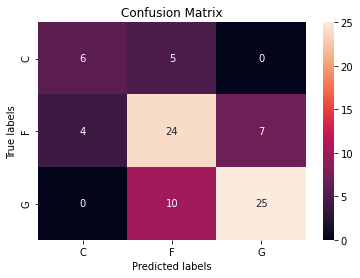

In [48]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['C', 'F','G']);
ax.yaxis.set_ticklabels(['C', 'F','G']);

Trying to visualize the decison tree

In [49]:
from IPython.display import Image  
from six import StringIO 
from sklearn.tree import export_graphviz
import pydot

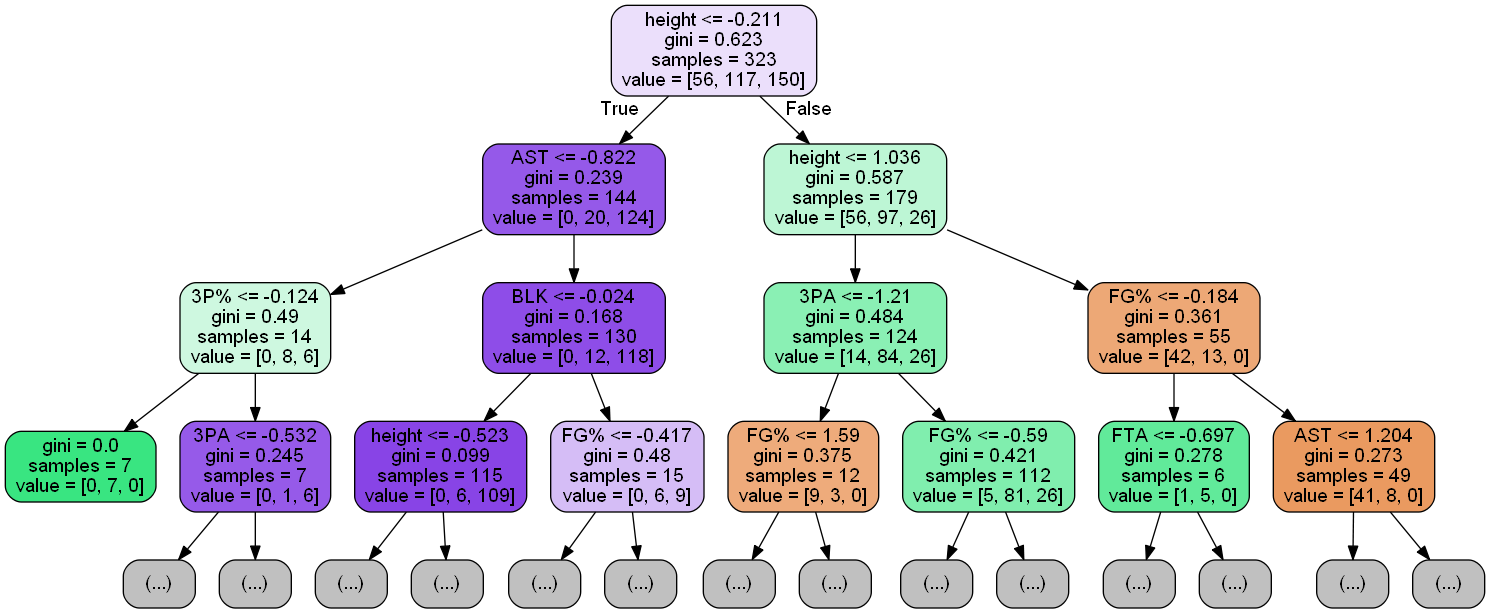

In [50]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=X.columns,filled=True,rounded=True,max_depth=3)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

# Naïve Bayes

Importing Naïve Bayes library

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
gnb = GaussianNB()

Creating the model by fitting the data

In [53]:
gnb.fit(X_train,y_train)

GaussianNB()

In [54]:
pred = gnb.predict(X_test)

In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           C       0.77      0.91      0.83        11
           F       0.79      0.74      0.76        35
           G       0.83      0.83      0.83        35

    accuracy                           0.80        81
   macro avg       0.80      0.83      0.81        81
weighted avg       0.80      0.80      0.80        81



We got 89% accuracy

Precison: Accuracy of positive predicitons 88%

Recall: Fraction of positives that were correctly identified 88%

F1 Score: The percentage of positive predictions correctly predicted 88%

In [56]:
print(confusion_matrix(y_test,pred))

[[10  1  0]
 [ 3 26  6]
 [ 0  6 29]]


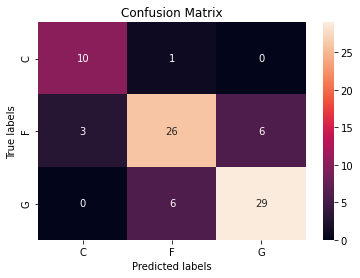

In [57]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['C', 'F','G']);
ax.yaxis.set_ticklabels(['C', 'F','G']);

# KMeans

Importing KMeans libray

In [58]:
from sklearn.cluster import KMeans

In [59]:
km.drop(['POS','Name'],axis=1,inplace=True)

In [60]:
kmeans = KMeans(n_clusters=3)

Creating the model by fitting the data

In [61]:
kmeans.fit(km)

KMeans(n_clusters=3)

In [62]:
prediction = kmeans.predict(km)

In [63]:
kmeans.cluster_centers_

array([[4.18662420e+01, 1.83280255e+01, 7.45859873e+00, 2.76560510e+00,
        6.18216561e+00, 4.50535032e+01, 8.31847134e-01, 2.49108280e+00,
        3.02942675e+01, 1.10254777e+00, 1.46178344e+00, 7.42815287e+01,
        3.32420382e+00, 1.66433121e+00, 5.87898089e-01, 3.82802548e-01,
        9.47133758e-01, 1.24203822e+00, 2.54777070e-02, 1.27731210e+01,
        1.99058344e+02],
       [6.82124352e+01, 2.55077720e+01, 1.16528497e+01, 4.21139896e+00,
        9.43834197e+00, 4.49849741e+01, 1.55647668e+00, 4.29740933e+00,
        3.57217617e+01, 1.67150259e+00, 2.08341969e+00, 7.97222798e+01,
        3.85181347e+00, 2.57927461e+00, 8.08808290e-01, 3.86010363e-01,
        1.29067358e+00, 2.63730570e+00, 1.03626943e-01, 1.38886528e+01,
        1.96185389e+02],
       [6.74259259e+01, 3.04629630e+01, 1.71629630e+01, 6.46666667e+00,
        1.24870370e+01, 5.41425926e+01, 1.02222222e+00, 2.96481481e+00,
        2.58722222e+01, 3.22037037e+00, 4.26666667e+00, 7.26833333e+01,
        8.6203

In [64]:
km['clusters'] = prediction

In [65]:
km.head()

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,REB,AST,STL,BLK,TO,DD2,TD3,PER,height,clusters
0,68,33.8,30.6,9.8,19.6,49.9,1.4,3.7,37.1,9.6,...,11.7,4.2,1.1,1.5,3.1,46,2,31.24,213.36,2
1,56,37.2,30.3,11.4,21.8,52.4,2.9,8.0,35.9,4.5,...,8.2,6.2,1.3,1.1,3.5,21,6,26.25,205.74,2
2,67,32.9,29.9,10.3,18.6,55.3,1.1,3.6,29.3,8.3,...,11.6,5.8,1.1,1.4,3.3,46,4,32.12,210.82,2
3,55,37.2,29.9,10.5,20.3,51.8,2.1,5.5,38.3,6.8,...,7.4,6.4,0.9,0.9,3.5,18,4,25.69,208.28,2
4,65,35.4,28.4,9.9,21.6,45.7,3.1,8.8,35.3,5.6,...,9.1,8.7,1.2,0.6,4.5,44,10,25.13,200.66,2


In [66]:
km['clusters'].value_counts()

1    193
0    157
2     54
Name: clusters, dtype: int64

Visualizing the clusters

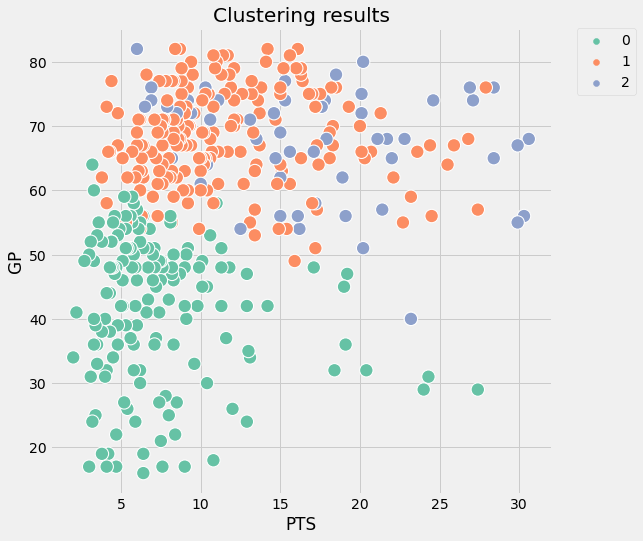

In [67]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

sns.scatterplot("PTS","GP",s=180, data=km,hue="clusters",palette='Set2').set_title("Clustering results")
 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

# Final Conclusion:

### Best Accuracy Score: Naïve Bayes Model 89%
### Best Classification Report: Naïve Bayes Model Precison: 88% Recall: 88% F1 Score: 88%
### Best Overall Model: Naïve Bayes Model